<a href="https://colab.research.google.com/github/Samhitha-Medi/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

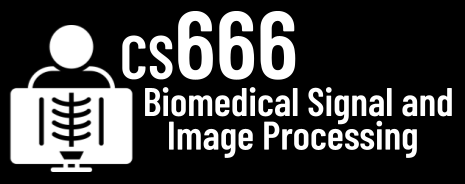

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 9.5 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [27]:
#!wget https://cs666.org/data/ecg.txt
from biosppy import storage
from google.colab import drive
drive.mount('/content/drive')
signal, metadata = storage.load_txt('ecg.txt')

Mounted at /content/drive


In [28]:
signal
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [29]:
SAMPLING_RATE =1000 
SECONDS =len(signal)/SAMPLING_RATE

In [30]:
print(SAMPLING_RATE,"Hz")
print(SECONDS,"sec")

1000 Hz
15.0 sec


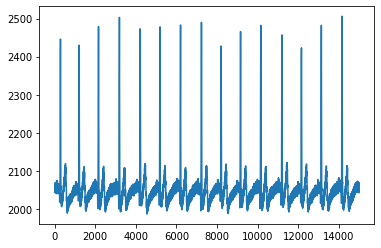

In [31]:
import matplotlib.pyplot as plt
(plt.plot(signal))

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [37]:
from biosppy.signals import ecg
out = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

Text(0.5, 1.0, 'UNFILTERED SIGNAL')

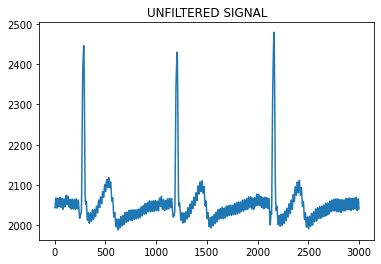

In [38]:
# Unfiltered Signal

third_second= 3*SAMPLING_RATE
plt.plot(signal[0:third_second])
plt.title("UNFILTERED SIGNAL")

Text(0.5, 1.0, 'FILTERED SIGNAL')

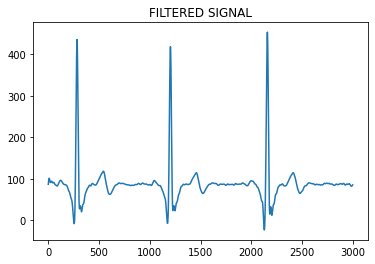

In [39]:
# Filtered signal
filtered=out[1]
plt.plot(filtered[0:third_second])
plt.title("FILTERED SIGNAL")

In [40]:
out[6]

array([64.37346158, 62.09428095, 59.92909647, 59.45751717, 59.78401705,
       59.61351988, 59.80384784, 60.93964357, 61.57981863, 60.11251957,
       60.02553251, 60.41367576, 60.77015992, 59.50884753])

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

Text(0.5, 0, 'time[s]')

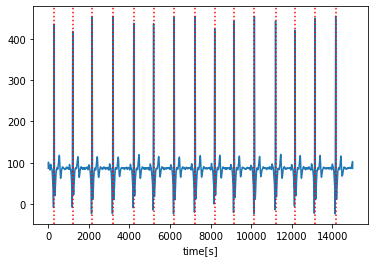

In [43]:
plt.plot(filtered)
rpeaks=out[2]
for i in range(0,len(rpeaks)):
  plt.axvline(x=rpeaks[i],color='r',ls=':')
plt.xlabel('time[s]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [44]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


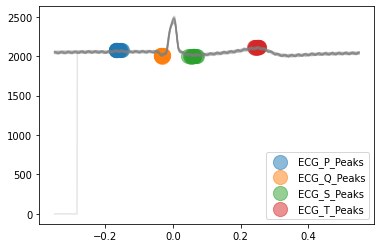

In [45]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

__, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

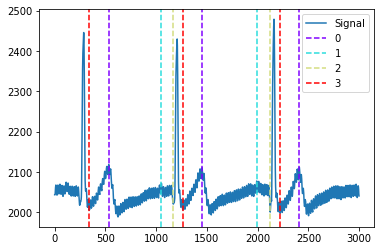

In [46]:
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3], 
                       waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3]], signal[:3000])

In [ ]:
# TODO Does the detection work well?


The detection does work well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [47]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


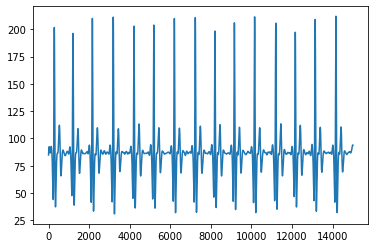

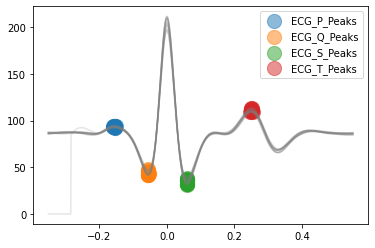

In [48]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

filtered_s = nk.signal_filter(filtered, lowcut=0, highcut=10)
plt.plot(filtered_s)

_, waves_peak = nk.ecg_delineate(filtered_s, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


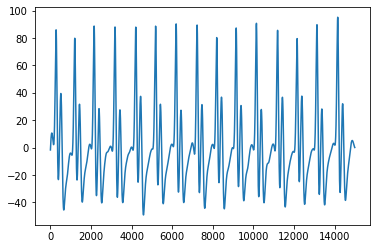

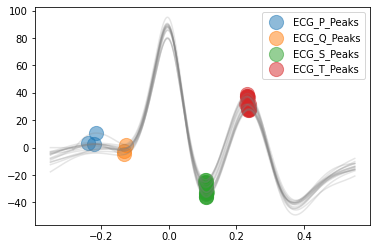

In [49]:
filtered_s = nk.signal_filter(signal, lowcut=0.5, highcut=5)
plt.plot(filtered_s)
_, waves_peak = nk.ecg_delineate(filtered_s, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


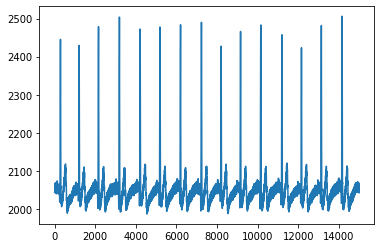

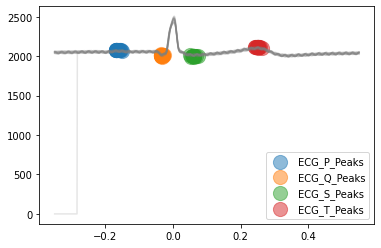

In [50]:
filtered_s = nk.signal_filter(signal, lowcut=0, highcut=150)
plt.plot(filtered_s)
_, waves_peak = nk.ecg_delineate(filtered_s, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


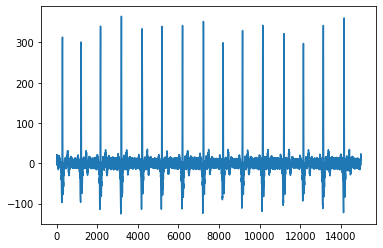

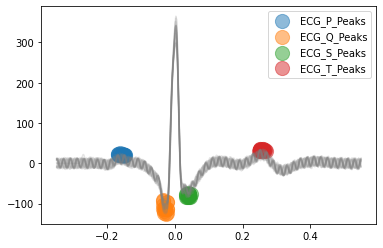

In [51]:
filtered_s = nk.signal_filter(signal, lowcut=5, highcut=80)
plt.plot(filtered_s)
_, waves_peak = nk.ecg_delineate(filtered_s, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


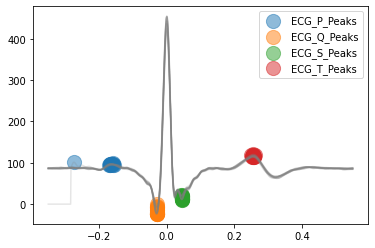

In [52]:
# Finally, run the delineation on the filtered signal from BioSPPY.
__, waves_peak = nk.ecg_delineate(filtered, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?

By running the delineation on filtered signal we get the best one. 

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#